## Observations and Insights

## Dependencies and starter code

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
combined_mousetesting = pd.merge(mouse_metadata, study_results, on="Mouse ID")
combined_mousetesting.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_groups = combined_mousetesting.groupby("Drug Regimen")
print(drug_groups)

Tumor_mean_numpy = drug_groups["Tumor Volume (mm3)"].mean()
Tumor_median_numpy = drug_groups["Tumor Volume (mm3)"].median()
variance_numpy = drug_groups["Tumor Volume (mm3)"].var()
Standard_dev_numpy = drug_groups["Tumor Volume (mm3)"].std()

stats_df = pd.DataFrame({"Mean": Tumor_mean_numpy,
                        "Median": Tumor_median_numpy,
                        "Var": variance_numpy,
                        "Std Dev": Standard_dev_numpy})
stats_df.head()




,Mean,Median,Var,Std Dev
Drug Regimen,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774
Ceftamin,52.591172,51.776157,39.290177,6.268188
Infubinol,52.884795,51.820584,43.128684,6.567243
Ketapril,55.235638,53.698743,68.553577,8.279709
Naftisol,54.331565,52.509285,66.173479,8.134708


## Bar plots

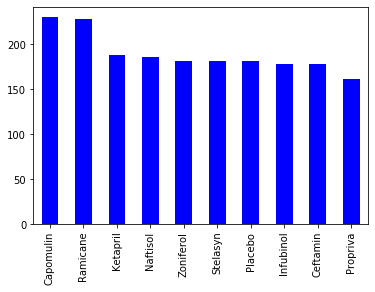

In [36]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

drug_data = combined_mousetesting["Drug Regimen"].value_counts()
drug_data.plot(kind="bar", facecolor="blue")



<BarContainer object of 10 artists>

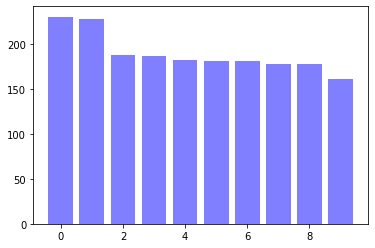

In [37]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drugs = drug_data
x_axis = np.arange(len(drugs))

plt.bar(x_axis, drugs, color='b', alpha=0.5, align="center")

## Pie plots

Male      958
Female    935
Name: Sex, dtype: int64


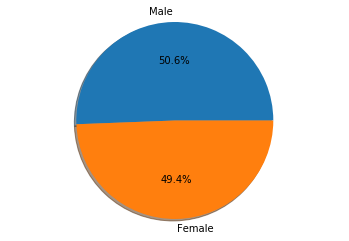

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
genders = combined_mousetesting["Sex"].value_counts()
names = ["Male", "Female"]
print(genders)

# Tell matplotlib to create a pie chart based upon the above data
plt.pie(genders, labels=names,
        autopct="%1.1f%%", shadow=True, startangle=0)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
#plt.savefig("../Images/PyPies.png")
plt.show()

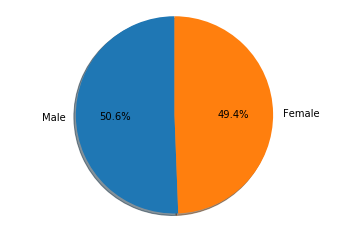

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(genders, labels=names,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()


## Quartiles, outliers and boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
#Calculate the IQR and quantitatively determine if there are any potential outliers. 

mouse_group = combined_mousetesting.groupby(["Mouse ID"]).max()

quartiles = mouse_group['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

mouse_group.head()


The lower quartile of occupancy is: 46.91089166
The upper quartile of occupancy is: 64.95756185
The interquartile range of occupancy is: 18.046670190000007
The the median of occupancy is: 55.84141007 
Values below 19.840886374999986 could be outliers.
Values above 92.02756713500001 could be outliers.


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a262,Placebo,Female,17,29,45,70.717621,4
a275,Ceftamin,Female,20,28,45,62.999356,3
a366,Stelasyn,Female,16,29,30,63.440686,1


In [41]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#combined_mousetesting.set_index("Drug Regimen", inplace=True)
#combined_mousetesting.head()

infubinol_df = combined_mousetesting.loc[combined_mousetesting["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = combined_mousetesting.loc[combined_mousetesting["Drug Regimen"] == "Ceftamin", :]
Stelasyn_df = combined_mousetesting.loc[combined_mousetesting["Drug Regimen"] == "Stelasyn", :]
Ketapril_df = combined_mousetesting.loc[combined_mousetesting["Drug Regimen"] == "Ketapril", :]
#data_4.boxplot(by ="Drug Regimen", column =['Tumor Volume (mm3)'], grid = False)



In [50]:
infu = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infuvol = pd.DataFrame(infu)
infumerge = pd.merge(infuvol, combined_mousetesting, on=("Mouse ID","Timepoint"),how="left")
infumerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [49]:
drug0 = infumerge["Tumor Volume (mm3)"]

quartiles0 = drug0.quantile([.25,.5,.75])
lower0 = quartiles0[0.25]
upper0 = quartiles0[0.75]
iqr0 = upper0-lower0
print(f"The lower quartile of occupancy is: {lower0}")
print(f"The upper quartile of occupancy is: {upper0}")
print(f"The interquartile range of occupancy is: {iqr0}")
print(f"The the median of occupancy is: {quartiles0[0.5]} ")


lower_bound0 = lower0 - (1.5*iqr)
upper_bound0 = upper0 + (1.5*iqr)
print(f"Values below {lower_bound0} could be outliers.")
print(f"Values above {upper_bound0} could be outliers.")
drug0.head()

The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of occupancy is: 60.16518046 
Values below 26.978602404999986 could be outliers.
Values above 92.59574813500001 could be outliers.


0    67.973419
1    65.525743
2    57.031862
3    66.083066
4    72.226731
Name: Tumor Volume (mm3), dtype: float64

In [51]:
ceft = Ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftvol = pd.DataFrame(ceft)
ceftmerge = pd.merge(ceftvol, combined_mousetesting, on=("Mouse ID","Timepoint"),how="left")
ceftmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [53]:
drug1 = ceftmerge["Tumor Volume (mm3)"]

quartiles1 = drug1.quantile([.25,.5,.75])
lower1 = quartiles1[0.25]
upper1 = quartiles1[0.75]
iqr1 = upper1-lower1
print(f"The lower quartile of occupancy is: {lower1}")
print(f"The upper quartile of occupancy is: {upper1}")
print(f"The interquartile range of occupancy is: {iqr1}")
print(f"The the median of occupancy is: {quartiles1[0.5]} ")


lower_bound1 = lower1 - (1.5*iqr1)
upper_bound1 = upper1 + (1.5*iqr1)
print(f"Values below {lower_bound1} could be outliers.")
print(f"Values above {upper_bound1} could be outliers.")
drug1.head()

The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartile range of occupancy is: 15.577752179999997
The the median of occupancy is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


0    62.999356
1    45.000000
2    56.057749
3    55.742829
4    48.722078
Name: Tumor Volume (mm3), dtype: float64

In [57]:
stel = Stelasyn_df.groupby('Mouse ID').max()['Timepoint']
stelvol = pd.DataFrame(stel)
stelmerge = pd.merge(stelvol, combined_mousetesting, on=("Mouse ID","Timepoint"),how="left")
stelmerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a366,30,Stelasyn,Female,16,29,63.440686,1
1,a492,45,Stelasyn,Male,20,25,60.122011,1
2,a963,45,Stelasyn,Female,23,27,62.765093,1
3,b879,45,Stelasyn,Female,4,26,72.555239,2
4,c402,45,Stelasyn,Female,1,27,74.040390,3


In [56]:
drug2 = stelmerge["Tumor Volume (mm3)"]

quartiles2 = drug2.quantile([.25,.5,.75])
lower2 = quartiles2[0.25]
upper2 = quartiles2[0.75]
iqr2 = upper2-lower2
print(f"The lower quartile of occupancy is: {lower2}")
print(f"The upper quartile of occupancy is: {upper2}")
print(f"The interquartile range of occupancy is: {iqr2}")
print(f"The the median of occupancy is: {quartiles2[0.5]} ")


lower_bound2 = lower2 - (1.5*iqr2)
upper_bound2 = upper2 + (1.5*iqr2)
print(f"Values below {lower_bound2} could be outliers.")
print(f"Values above {upper_bound2} could be outliers.")
drug2.head()

The lower quartile of occupancy is: 48.72207785
The upper quartile of occupancy is: 64.29983003
The interquartile range of occupancy is: 15.577752179999997
The the median of occupancy is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


0    62.999356
1    45.000000
2    56.057749
3    55.742829
4    48.722078
Name: Tumor Volume (mm3), dtype: float64

In [58]:
keta = Ketapril_df.groupby('Mouse ID').max()['Timepoint']
ketavol = pd.DataFrame(keta)
ketamerge = pd.merge(ketavol, combined_mousetesting, on=("Mouse ID","Timepoint"),how="left")
ketamerge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a457,10,Ketapril,Female,11,30,49.783419,0
1,c580,30,Ketapril,Male,22,25,58.046569,3
2,c819,40,Ketapril,Male,21,25,62.175705,1
3,c832,45,Ketapril,Male,18,29,65.415955,3
4,d474,40,Ketapril,Male,18,27,60.233733,1


In [59]:
drug3 = ketamerge["Tumor Volume (mm3)"]

quartiles3 = drug3.quantile([.25,.5,.75])
lower3 = quartiles3[0.25]
upper3 = quartiles3[0.75]
iqr3 = upper3-lower3
print(f"The lower quartile of occupancy is: {lower3}")
print(f"The upper quartile of occupancy is: {upper3}")
print(f"The interquartile range of occupancy is: {iqr3}")
print(f"The the median of occupancy is: {quartiles3[0.5]} ")


lower_bound3 = lower3 - (1.5*iqr3)
upper_bound3 = upper3 + (1.5*iqr3)
print(f"Values below {lower_bound3} could be outliers.")
print(f"Values above {upper_bound3} could be outliers.")
drug3.head()

The lower quartile of occupancy is: 56.72009545
The upper quartile of occupancy is: 69.87225079
The interquartile range of occupancy is: 13.152155339999993
The the median of occupancy is: 64.48781246 
Values below 36.99186244000001 could be outliers.
Values above 89.60048379999998 could be outliers.


0    49.783419
1    58.046569
2    62.175705
3    65.415955
4    60.233733
Name: Tumor Volume (mm3), dtype: float64

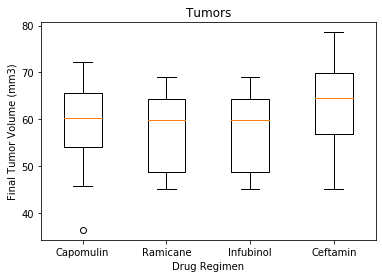

In [61]:
drug_boxplot = [drug0, drug1, drug2, drug3]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(drug_boxplot, labels=["Infubinol","Ceftamin","Stelasyn","Ketapril",])

plt.savefig('boxplot')
plt.show()


## Line and scatter plots

In [63]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
cap_df = combined_mousetesting.loc[combined_mousetesting["Drug Regimen"] == "Capomulin", :]

line_cap = cap_df.loc[cap_df["Mouse ID"] == "l509",:]
line_cap.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
371,l509,Capomulin,Male,17,21,0,45.000000,0
372,l509,Capomulin,Male,17,21,5,45.851193,0
373,l509,Capomulin,Male,17,21,10,46.759074,0
374,l509,Capomulin,Male,17,21,15,47.488599,1
375,l509,Capomulin,Male,17,21,20,48.070452,2


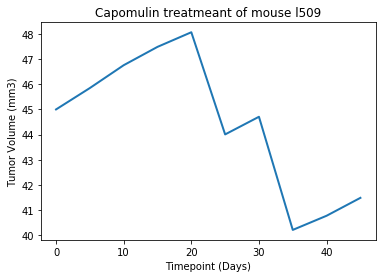

In [64]:
x_axisTP = line_cap["Timepoint"]
tumsiz = line_cap["Tumor Volume (mm3)"]

plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axisTP, tumsiz,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.savefig('linechart')
plt.show()

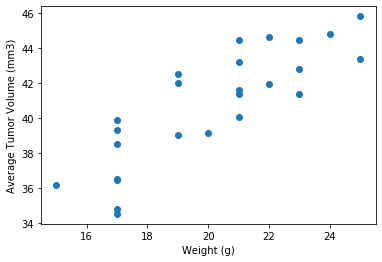

In [65]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capavg = cap_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()

In [66]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [67]:
model=st.linregress(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
model

LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

In [69]:
mslope = 0.9544396890241045
bintercept = 21.552160532685015

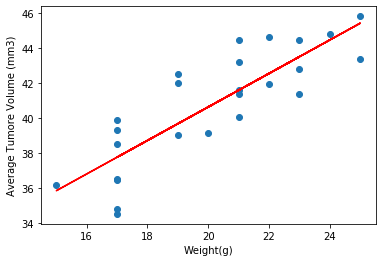

In [70]:
y_values = capavg['Weight (g)']*mslope+bintercept
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.plot(capavg['Weight (g)'],y_values,color="red")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')

plt.savefig('linearregression')
plt.show()